## Are You in the Right Generation as a Developer?

a common topic topic of disscussion recently is the generational differences. in this analysis, i explore the difference between generations of developers based on the data from stack overflow 2019 survey

### Section 1: Business Understanding

Questions:

1. which generation has the most developers? 

2. which generation is paid most?

3. which generation is most self taught?

4. does the eduacation level and employment vary with each generation?

5. which generation is most satisfied with their programming career?

### Section 2: Data Understanding

In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Section 2.1: Gather

In [3]:
#to show all columns of dataframe
pd.set_option('display.max_columns', None)

df = pd.read_csv('survey_results_public.csv')
df1 = pd.read_csv('survey_results_schema.csv')
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

#### Section 2.2: Assess

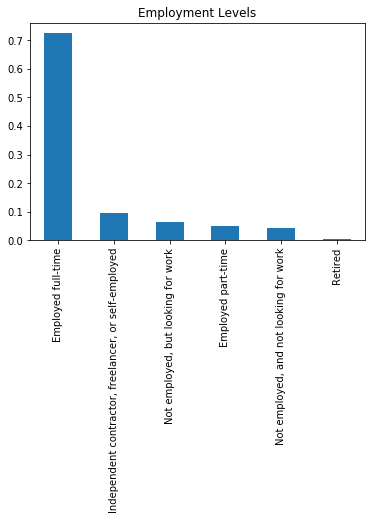

In [2]:
# understanding employment levels in the data
(df['Employment'].value_counts()/df.shape[0]).plot(kind='bar');
plt.title('Employment Levels');

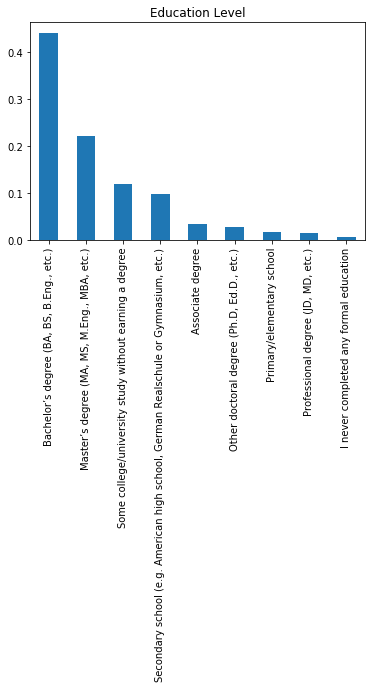

In [3]:
 #understanding education levels in the data
(df['EdLevel'].value_counts()/df.shape[0]).plot(kind='bar');
plt.title('Education Level');

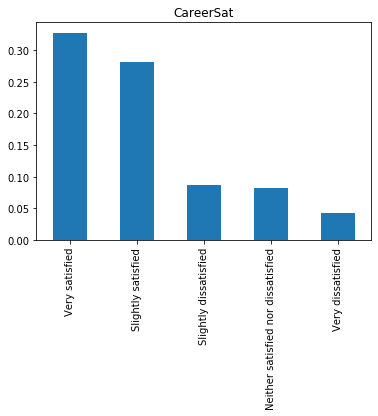

In [4]:
 #understanding career satisfaction in the data
(df['CareerSat'].value_counts()/df.shape[0]).plot(kind='bar');
plt.title('CareerSat');

### Section 3: Data Preperation

#### Section 3.1: Clean
the data is first categorized into generations using the following function

In [4]:
def Generation(age): 
    
    '''
    Categorizes an age into its corresponding generation.
    
    INPUT
    age value
    
    OUTPUT
    a generation string variable
    
    '''
    
    age = int(age)
    
    if age in range(7,23):
        generation = 'Generation Z'
    
    elif age in range(23,39):
        generation = 'Millenial'
    
    elif age in range(39,55):
        generation = 'Generation X'
    
    elif age in range(55,74):
        generation = 'Boomer'
        
    elif age in range(74,92):
        generation = 'Silent'
    else: 
        generation = 'Other'

    return generation 

#rows with null age values are removed from df as they are not needed
df = df.dropna(subset=['Age'], how='any')

#apply the Generatoin function
df['Generation'] = df['Age'].apply(Generation)

#drop rows with a generation of (other) as it is not useful in the comparsion
df.drop(df.index[df['Generation'] == 'Other'], inplace = True)

/Users/rawan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rawan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


The following columns are selected for analysis in addition to the formed Generation column:
Employment,
CareerSat,
EdLevel,
EduOther,
ConvertedComp. They are put in a new data frame

In [7]:
new_df=df[['Generation','Employment','CareerSat','EdLevel','EduOther','ConvertedComp']]
new_df

,Generation,Employment,CareerSat,EdLevel,EduOther,ConvertedComp
0,Generation Z,"Not employed, and not looking for work",NaN,Primary/elementary school,"Taught yourself a new language, framework, or ...",NaN
1,Generation Z,"Not employed, but looking for work",NaN,"Secondary school (e.g. American high school, G...",Taken an online course in programming or softw...,NaN
2,Millenial,Employed full-time,Slightly satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Taught yourself a new language, framework, or ...",8820.0
3,Generation Z,Employed full-time,Very satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,61000.0
4,Millenial,Employed full-time,Very dissatisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,NaN
...,...,...,...,...,...,...
88870,Boomer,"Not employed, and not looking for work",NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN
88871,Generation Z,"Independent contractor, freelancer, or self-em...",NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,NaN
88872,Millenial,Employed part-time,NaN,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Taught yourself a new language, framework, or ...",NaN
88876,Generation X,Employed full-time,NaN,"Secondary school (e.g. American high school, G...","Taught yourself a new language, framework, or ...",NaN


Since the career satisfaction is categorical, a function is created to map each value into an integer

In [8]:
def handle_CareerSat(df):
    
    '''
    Maps categorical career satisfation to numerical values.
    
    INPUT
    data frame
    
    OUTPUT
    data fame with mapped career satisfation
    
    '''
    
    #null values are replaced with zero to calculate the mean
    CareerSat_map = {
        'Very satisfied' : 5,
        'Slightly satisfied' : 4,
        'Neither satisfied nor dissatisfied' : 3,
        'Slightly dissatisfied' : 2,
        'Very dissatisfied' : 1,
        np.nan: 0
    }
    
    new_df['CareerSat'] = new_df['CareerSat'].apply(lambda x: CareerSat_map[x] )
    
    return new_df

In [9]:
df_CareerSat_handled=handle_CareerSat(df)
df_CareerSat_handled

/Users/rawan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Generation,Employment,CareerSat,EdLevel,EduOther,ConvertedComp
0,Generation Z,"Not employed, and not looking for work",0,Primary/elementary school,"Taught yourself a new language, framework, or ...",NaN
1,Generation Z,"Not employed, but looking for work",0,"Secondary school (e.g. American high school, G...",Taken an online course in programming or softw...,NaN
2,Millenial,Employed full-time,4,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Taught yourself a new language, framework, or ...",8820.0
3,Generation Z,Employed full-time,5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,61000.0
4,Millenial,Employed full-time,1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,NaN
...,...,...,...,...,...,...
88870,Boomer,"Not employed, and not looking for work",0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN
88871,Generation Z,"Independent contractor, freelancer, or self-em...",0,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Taken an online course in programming or softw...,NaN
88872,Millenial,Employed part-time,0,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Taught yourself a new language, framework, or ...",NaN
88876,Generation X,Employed full-time,0,"Secondary school (e.g. American high school, G...","Taught yourself a new language, framework, or ...",NaN


#### Section 3.2: Analyze

The cleaned data is analyzed based on the questions to find the answers for each one

##### Question 2: which generation is paid most?

##### Question 5: which generation is most satisfied with their programming career?

these two question are related so they will be analyzed together

In [10]:
#a new data framed with the data grouped based on the generation, education Level and employment
ddf = new_df.groupby(['Generation', 'EdLevel','Employment']).mean().reset_index().sort_values(by=['ConvertedComp'],ascending=False)

# some combinations of the grouping do not exist, thus these nulls are removed
ddf = ddf.dropna(subset=['ConvertedComp'], how='any')

ddf

,Generation,EdLevel,Employment,CareerSat,ConvertedComp
201,Silent,"Other doctoral degree (Ph.D, Ed.D., etc.)",Employed full-time,5.000000,1000000.000000
58,Generation X,I never completed any formal education,"Independent contractor, freelancer, or self-em...",4.111111,517662.600000
1,Boomer,Associate degree,"Independent contractor, freelancer, or self-em...",3.166667,422964.166667
104,Generation Z,I never completed any formal education,Employed full-time,2.736842,294348.888889
0,Boomer,Associate degree,Employed full-time,4.258065,276114.888889
...,...,...,...,...,...
127,Generation Z,"Professional degree (JD, MD, etc.)","Independent contractor, freelancer, or self-em...",2.000000,11660.000000
112,Generation Z,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",2.535714,9592.500000
105,Generation Z,I never completed any formal education,Employed part-time,1.333333,8700.000000
72,Generation X,Primary/elementary school,Employed part-time,1.000000,7956.000000


i wanted to see how the sample size and compensation and satisfaction are related, a bigger circle indicates a larger sample size.

Text(0, 0.5, 'Average Compensation')

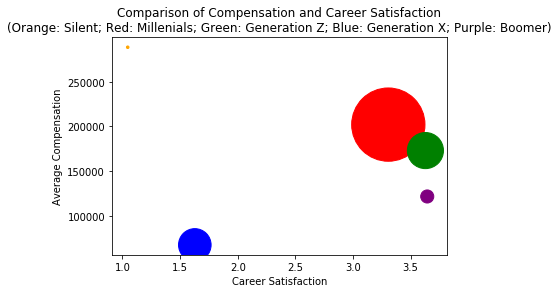

In [11]:
plt.scatter(new_df.groupby('Generation').mean().CareerSat, new_df.groupby('Generation').mean().ConvertedComp, (new_df.Generation.value_counts())/10,c=['red','green','blue','purple','orange'])

plt.title('Comparison of Compensation and Career Satisfaction\n(Orange: Silent; Red: Millenials; Green: Generation Z; Blue: Generation X; Purple: Boomer)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Average Compensation')

we can see that millenials comprise the largest sample size in this data set

##### Question 3: which generation is most self taught?

I want to find the number of participans from each generation who had another form of education other than obtaining a degree so I could use it in finding a percentage for the modeling

In [12]:
new_df['EduOther'].groupby(new_df['Generation']).count()

Generation
Boomer           1646
Generation X    10332
Generation Z    12313
Millenial       51660
Silent             57
Name: EduOther, dtype: int64

we can see that millenials have the largest value, however the percentages are a better indicator since millenials are the largest number in the sample

##### Question 4: does the eduacation level and employment vary with each generation?

I first want to have an understanding of all the generations' education and how it relates to their career satisfaction and compensation

In [14]:
# group data by generation and education level to analyze
df_emp_ed = new_df.groupby(['Generation', 'EdLevel']).mean()
df_emp_ed

CareerSat  \
Generation   EdLevel                                                         
Boomer       Associate degree                                     3.085714   
             Bachelor’s degree (BA, BS, B.Eng., etc.)             3.539809   
             I never completed any formal education               3.285714   
             Master’s degree (MA, MS, M.Eng., MBA, etc.)          3.346067   
             Other doctoral degree (Ph.D, Ed.D., etc.)            3.341317   
             Primary/elementary school                            3.000000   
             Professional degree (JD, MD, etc.)                   2.441860   
             Secondary school (e.g. American high school, Ge...   2.516129   
             Some college/university study without earning a...   3.217021   
Generation X Associate degree                                     3.521622   
             Bachelor’s degree (BA, BS, B.Eng., etc.)             3.706879   
             I never completed any formal education               3.094340   
             Master’s degree (MA, MS, M.Eng., MBA, etc.)          3.640236   
             Other doctoral degree (Ph.D, Ed.D., etc.)            3.697289   
             Primary/elementary school                            2.711111   
             Professional degree (JD, MD, etc.)                   3.198980   
             Secondary school (e.g. American high school, Ge...   3.382688   
             Some college/university study without earning a...   3.603480   
Generation Z Associate degree                                     2.440882   
             Bachelor’s degree (BA, BS, B.Eng., etc.)             2.526710   
             I never completed any formal education               0.786408   
             Master’s degree (MA, MS, M.Eng., MBA, etc.)          2.537190   
             Other doctoral degree (Ph.D, Ed.D., etc.)            2.555556   
             Primary/elementary school                            0.456062   
             Professional degree (JD, MD, etc.)                   2.662338   
             Secondary school (e.g. American high school, Ge...   1.083415   
             Some college/university study without earning a...   1.882116   
Millenial    Associate degree                                     3.545455   
             Bachelor’s degree (BA, BS, B.Eng., etc.)             3.706061   
             I never completed any formal education               3.421296   
             Master’s degree (MA, MS, M.Eng., MBA, etc.)          3.703768   
             Other doctoral degree (Ph.D, Ed.D., etc.)            3.874313   
             Primary/elementary school                            3.004184   
             Professional degree (JD, MD, etc.)                   3.310391   
             Secondary school (e.g. American high school, Ge...   3.134163   
             Some college/university study without earning a...   3.488921   
Silent       Bachelor’s degree (BA, BS, B.Eng., etc.)             0.312500   
             I never completed any formal education               4.000000   
             Master’s degree (MA, MS, M.Eng., MBA, etc.)          0.888889   
             Other doctoral degree (Ph.D, Ed.D., etc.)            1.642857   
             Professional degree (JD, MD, etc.)                   0.000000   
             Secondary school (e.g. American high school, Ge...   3.000000   
             Some college/university study without earning a...   1.166667   

                                                                 ConvertedComp  
Generation   EdLevel                                                            
Boomer       Associate degree                                    321299.282051  
             Bachelor’s degree (BA, BS, B.Eng., etc.)            217081.325700  
             I never completed any formal education              146290.800000  
             Master’s degree (MA, MS, M.Eng., MBA, etc.)         207581.603846  
             Other doctoral degree (Ph.D, Ed.D., etc.)           187

### Section 4: Results Evaluation

#### Section 4.1: Model and Visualize

here each question is answered with a graphical statstic 

##### Question 1: Which generation has the most developers? 

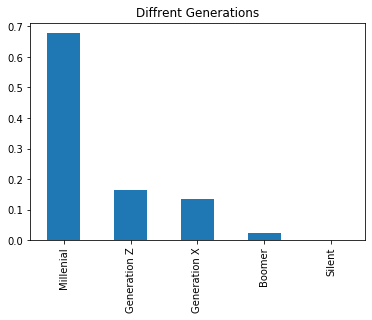

In [15]:
# the number or respondents from each generation in counted in a bar chart
(df['Generation'].value_counts()/df.shape[0]).plot(kind='bar');
plt.title('Diffrent Generations');

we can see that millenials are the largest number of developers who answered the survey

##### Question 2: which generation is paid most?
##### Question 5: which generation is most satisfied with their programming career?

the average career satisfaction and average compensation are grouped by generation and plotted

Text(0, 0.5, 'Average Compensation')

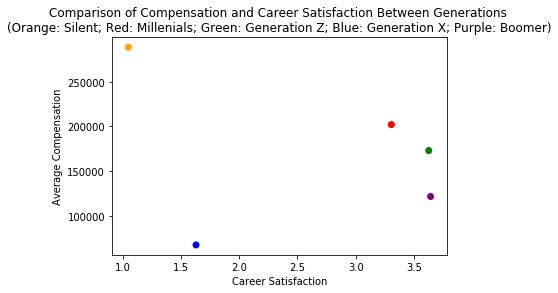

In [19]:
# scatter plot of average compensation and satisfaction by generation
plt.scatter(new_df.groupby('Generation').mean().CareerSat, new_df.groupby('Generation').mean().ConvertedComp,c=['red','green','blue','purple','orange'])
plt.title('Comparison of Compensation and Career Satisfaction Between Generations \n(Orange: Silent; Red: Millenials; Green: Generation Z; Blue: Generation X; Purple: Boomer)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Average Compensation')

we can see that the silent generation are the highest compensated but with the lowest satisfaction, however they are the least in the sample. Gen Z and boomers are more satisfied than millenials despite being paid less

##### Question 3: which generation is most self taught?

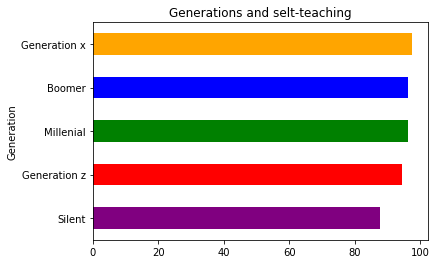

In [20]:
# the percentage of each generation is calculated
df_gen = new_df['Generation'];
m=100*51660/(df_gen[df_gen == "Millenial"].value_counts());
z=100*12313/(df_gen[df_gen == "Generation Z"].value_counts());
x=100*10332/(df_gen[df_gen == "Generation X"].value_counts());
b=100*1646/(df_gen[df_gen == "Boomer"].value_counts());
s=100*57/(df_gen[df_gen == "Silent"].value_counts());

# the calculated percentages are put into a data frame for plotting
gdf=pd.DataFrame([['Millenial',m[0]],['Generation z',z[0]], ['Generation x',x[0]],['Boomer',b[0]],['Silent',s[0]]],columns=['Generation','%'])
gdf=gdf.sort_values(by='%')

#horizontal bar chart
gdf.plot.barh(x='Generation',y='%',legend=None,color=['purple', 'red', 'green', 'blue', 'orange'], title='Generations and selt-teaching')

All generations have a high percentage of those who had some form of education other than obtaining a degree

##### Question 4: does the eduacation level and employment vary with each generation?

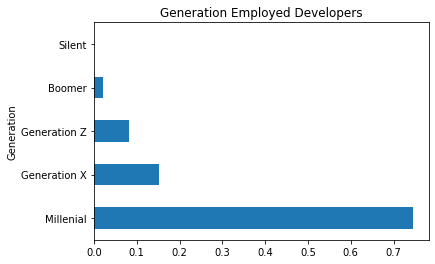

In [21]:
#bar plot of the level of education of employed developers grouped by generation

df_employed = new_df.loc[(new_df['Employment']== 'Employed full-time')| (new_df['Employment']=='Independent contractor, freelancer, or self-employed')]
df_employed=df_employed['Generation'].value_counts(normalize=True).reset_index()
df_employed.rename(columns={'index': 'Generation', 'Generation': 'Count'}, inplace=True)
df_employed.plot.barh(x='Generation', y='Count',title='Generation Employed Developers',legend=None)

Millenials are the most employed generation followed by Gen x

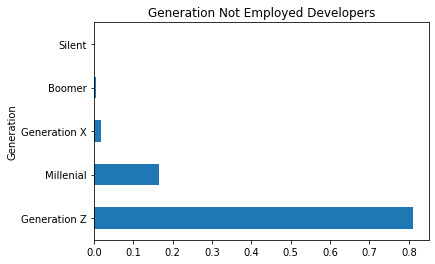

In [22]:
#bar plot of the level of education of unemployed developers grouped by generation

df_notemployed = new_df.loc[(new_df['Employment'] == 'Not employed, and not looking for work') | (new_df['Employment'] == 'Not employed, but looking for work ')]
df_notemployed=df_notemployed['Generation'].value_counts(normalize=True).reset_index()
df_notemployed.rename(columns={'index': 'Generation', 'Generation': 'Count'}, inplace=True)
df_notemployed.plot.barh(x='Generation', y='Count', title='Generation Not Employed Developers',legend=None)

Gen z are the least employed generation followed by millenials

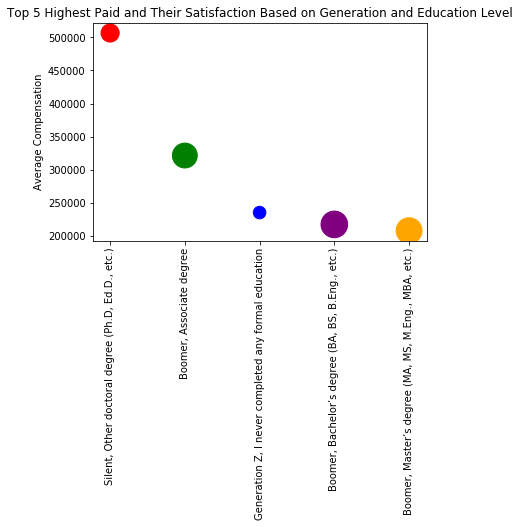

In [24]:
#the top 5 highest compensated are grouped by generation and education level
ndf=new_df.groupby(['Generation', 'EdLevel']).mean().reset_index().sort_values(by=['ConvertedComp'],ascending=False)
top5=ndf.head().reset_index()
top5=top5.drop('index',axis=1)

#the generation and education lever are concatenated to plot them on the x axis togther
top5['concatenated'] = top5['Generation'].str.cat(top5['EdLevel'],sep=", ")

#scatter plot of the result
plt.scatter(top5['concatenated'], top5['ConvertedComp'],top5.CareerSat*200,c=['red','green','blue','purple','orange'])
plt.xticks(rotation=90)
plt.ylabel('Average Compensation')
plt.title('Top 5 Highest Paid and Their Satisfaction Based on Generation and Education Level')
plt.show()

the size of the circle indicates satisfaction, we can see that older generations with higher degrees are the most compensated with good satisfaction. however, Gen z who never completed any formal education come third with low satisfaction